project name: IRIS FLOWER PREDICTION

name: Mitali Salunkhe

task no. 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read dataset 
data=pd.read_csv('Iris.csv')

In [3]:
#print first 5 rows of dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#columns present in csv
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#all info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# shape of dataframe rows,columns
data.shape

(150, 6)

In [8]:
#total null values in each column
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# names of unique species if iris flower
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
# deleting column id
del data['Id']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


since species are names, they are coverted to int format using label encoder 

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder=LabelEncoder()

In [32]:
data.Species=encoder.fit_transform(data.Species)

In [33]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
data['Species'].unique()

array([0, 1, 2], dtype=int64)

'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [36]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


visualisation of data

In [37]:
import seaborn as sns

<Axes: >

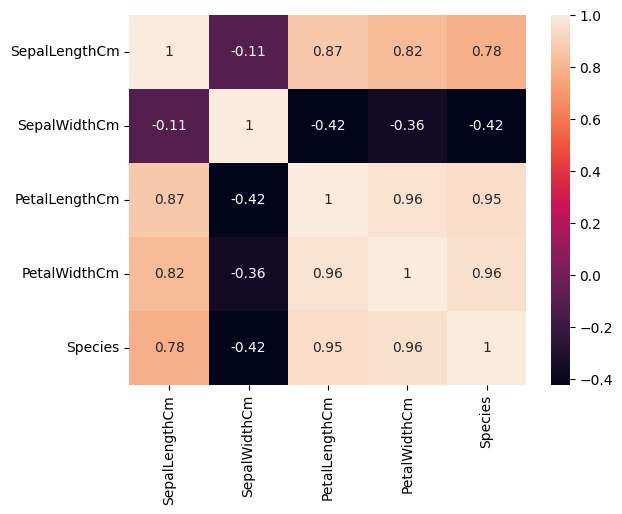

In [38]:
sns.heatmap(data.corr(),annot=True)

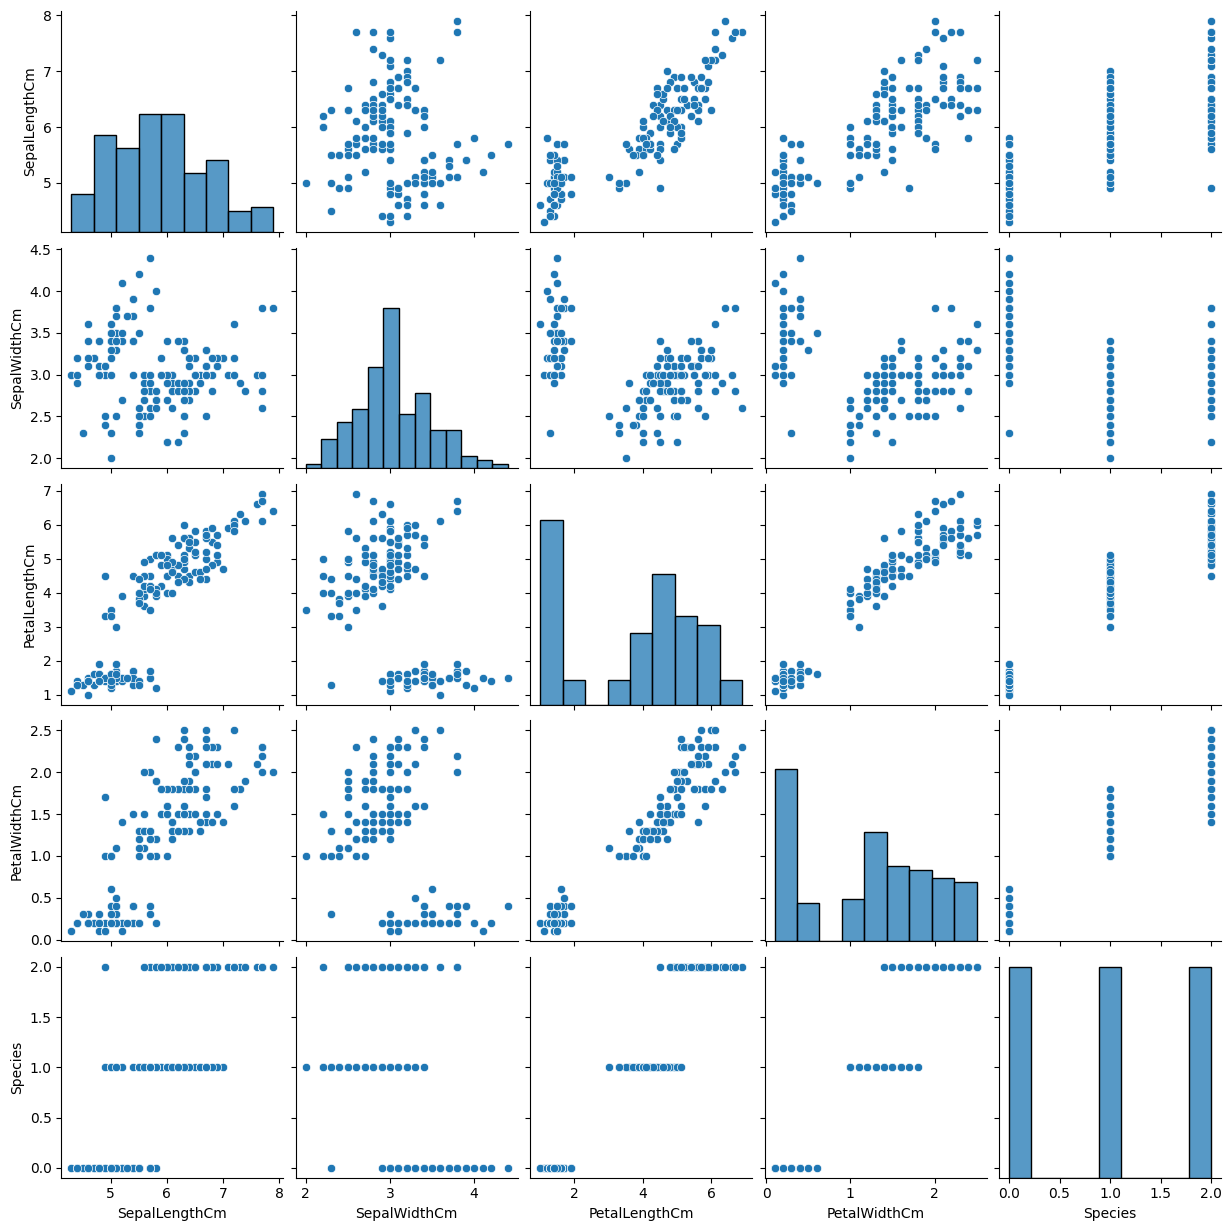

In [39]:
sns.pairplot(data)

training data

In [40]:
#splitting in two parts x: col 0 to 3 having info of flower, y: col 4 having species names
x=np.array(data.iloc[:,:-1].values)
y=np.array(data.iloc[:,4].values)

In [41]:
# train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [42]:
y_train

array([2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       1, 1], dtype=int64)

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


c:\Users\mital\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mital\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [47]:
classifier = LogisticRegression(penalty='l2', C=best_params['C'])
classifier.fit(x_train, y_train)

c:\Users\mital\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [48]:
y_pred = classifier.predict(x_test)

In [49]:
f=pd.DataFrame({"Actual":y_test,"predicted":y_pred})

In [50]:
f.iloc[30:50]

,Actual,predicted
30,0,0
31,0,0
32,2,2
33,1,1
34,1,1
35,0,0
36,1,1
37,1,1


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [55]:
# predict the output
input_data = np.array([6.9,3.1	,5.4,	2.1		])
input_data_reshaped = input_data.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(f"Predicted class: {prediction}")

Predicted class: [2]


In [56]:
import joblib
joblib.dump(classifier,"iris_model")

['iris_model']